# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей. 

In [2]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2024-11-08 14:52:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Connecting to 127.0.0.1:12334... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [          <=>       ] 201.24M  2.83MB/s    in 51s     

2024-11-08 14:53:04 (3.93 MB/s) - ‘data.txt.zip’ saved [211011981]



In [3]:
df = pd.read_csv('data.txt.zip')
df

,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515339,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515340,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515341,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515342,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [3]:
df.describe()

,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

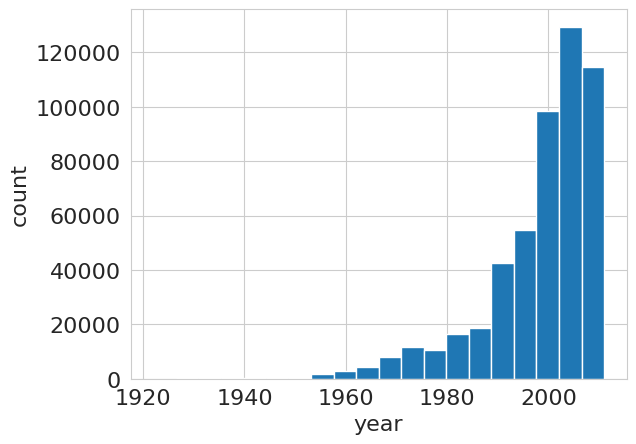

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128836, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [11]:
model = Ridge()
model.fit(X_train, y_train)
const = np.zeros(y_test.shape) + y_test.mean()
print(f"MSE on сonst baseline with Ridge regression: {mean_squared_error(y_test, const)}")
y_pred = model.predict(X_test)
print(f"MSE on test with Ridge regression: {mean_squared_error(y_test, y_pred)}")

MSE on сonst baseline with Ridge regression: 117.61872932647786
MSE on test with Ridge regression: 89.7561655683372


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [7]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if np.max(train_losses) / np.min(train_losses) > 10:
        axs[0].set_yscale('log')

    if np.max(train_metrics) / np.min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    """
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            dldf = criterion.backward(predictions, y_batch)
            model.backward(X_batch, dldf)
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do evaluation
            predictions = ...
            loss = ...
            '''

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Train loss: {train_losses[-1]:.3f}')
        print(f'Train MSE: {train_metrics[-1]:.3f}')
        print(f'Validation loss: {val_losses[-1]:.3f}')
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [8]:
y_train_new = y_train - y_train.min()
y_val_new = y_val - y_val.min()

In [9]:
batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = y_train_new.max() + 1

In [12]:
train_loader = mm.DataLoader(X_train, y_train_new, batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_new, batch_size, shuffle=False)
model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features))
optimizer = mm.SGD(model, lr=1e-3)
criterion = mm.CrossEntropyLoss()
metric = lambda predictions, y_batch: mean_squared_error(np.argmax(predictions, axis=1), y_batch)

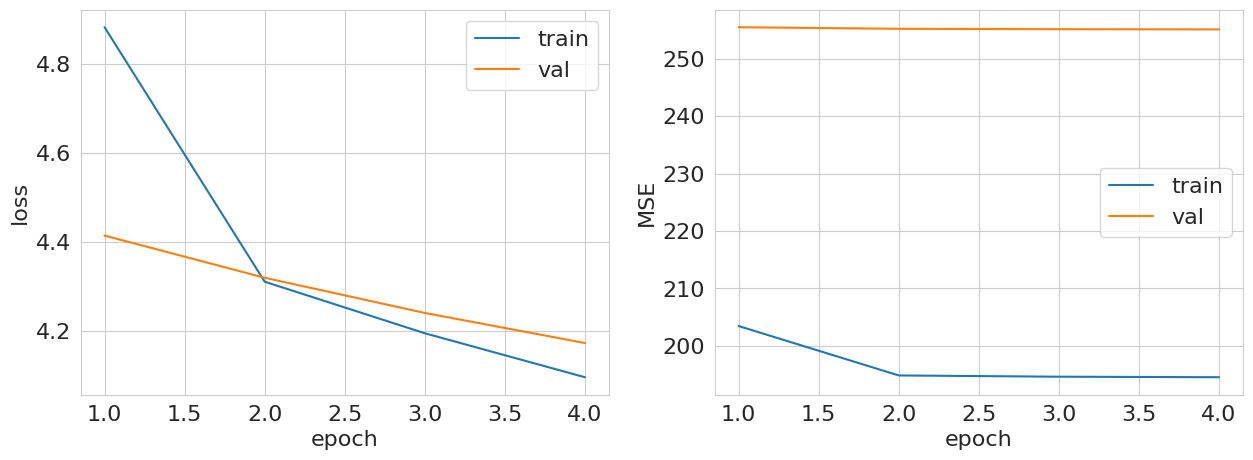

Train loss: 4.096
Train MSE: 194.525
Validation loss: 4.172
Validation MSE: 255.123


(np.float64(194.52541905126586), np.float64(255.122584784791))

In [13]:
train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 4, verbose=True)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Нет, побить бейзлайн не удалось, более того, модель совершенно не обучается. Классификатор, видимо, не очень хорошая идея учить, так как очень неравномерное распределение классов

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [10]:
out_features = 1

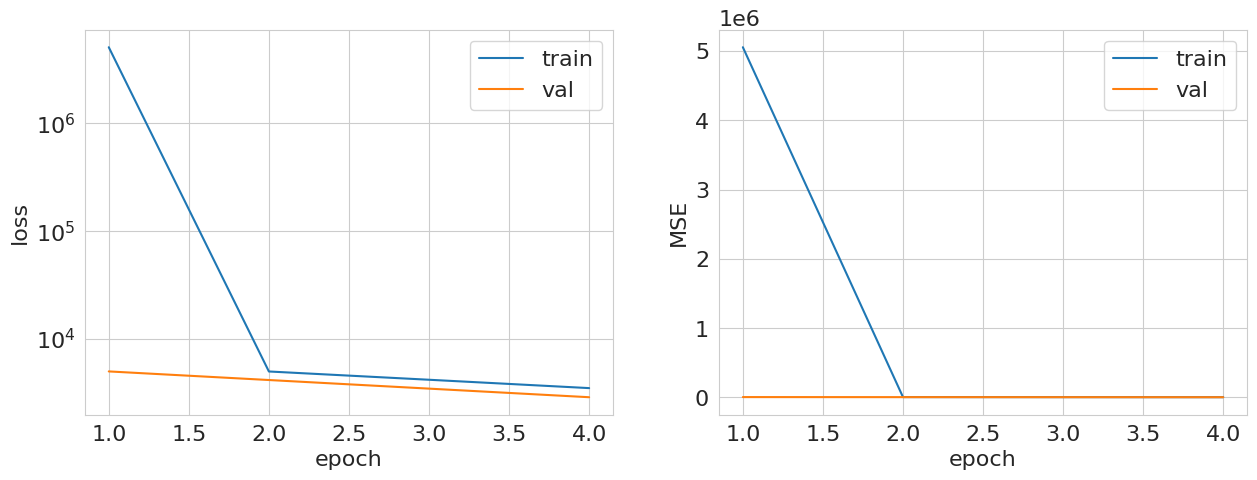

Train loss: 3468.737
Train MSE: 3468.737
Validation loss: 2854.946
Validation MSE: 2854.946


(np.float64(3468.7370818955865), np.float64(2854.946316465379))

In [19]:
train_loader = mm.DataLoader(X_train, y_train_new.reshape(-1, 1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_new.reshape(-1, 1), batch_size, shuffle=False)
model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features))
optimizer = mm.SGD(model, lr=1e-5)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(predictions, y_batch)
train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 4, verbose=True)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** В общем-то стабилизировать не получилось +  ошибка очень сильно варьируется, если не фиксировать random_seed. Видимо потому что у нас shuffle и так как у нас чуть ли не экспоненциальное распределение классов, в обучающей выборке каждый раз получаются очень разные распределения. Разный lr тоже не помог. Да и магнитуда значений монструозная - порядков 10^-3 up to 10^3. И вообще стало хуже

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [11]:
MIN = y_train.min()
MAX = y_train.max()

In [12]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - MIN) / (MAX - MIN)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return MIN + sample * (MAX - MIN)

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

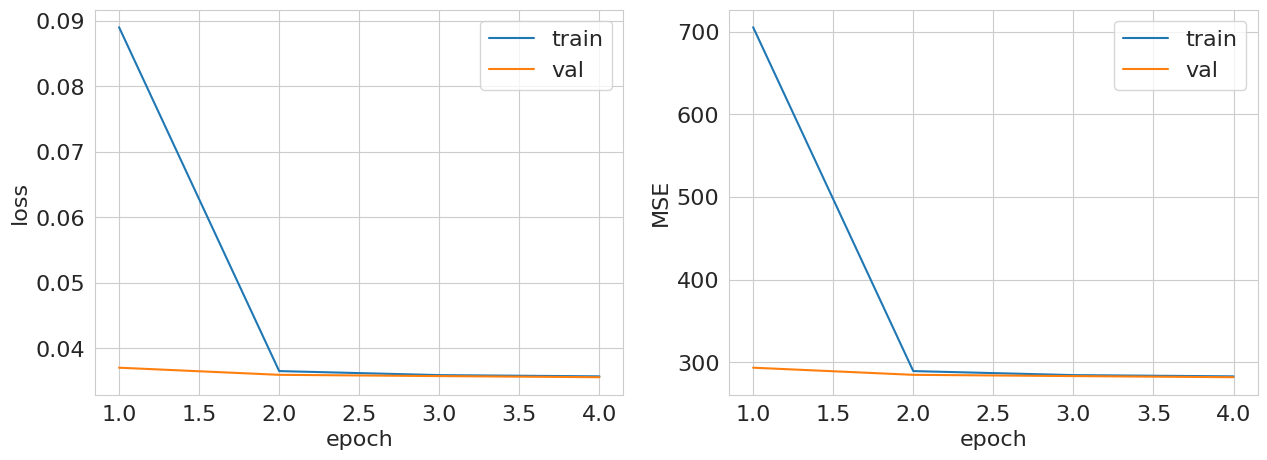

Train loss: 0.036
Train MSE: 283.035
Validation loss: 0.036
Validation MSE: 281.991


(np.float64(283.0354221568213), np.float64(281.9910034362389))

In [28]:
out_features = 1
train_loader = mm.DataLoader(X_train, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.SGD(model, lr=1e-5)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 4, verbose=True)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** Стало заметно лучше! И обучение стабилизировалось. 

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_val_new = scaler.fit_transform(X_val)

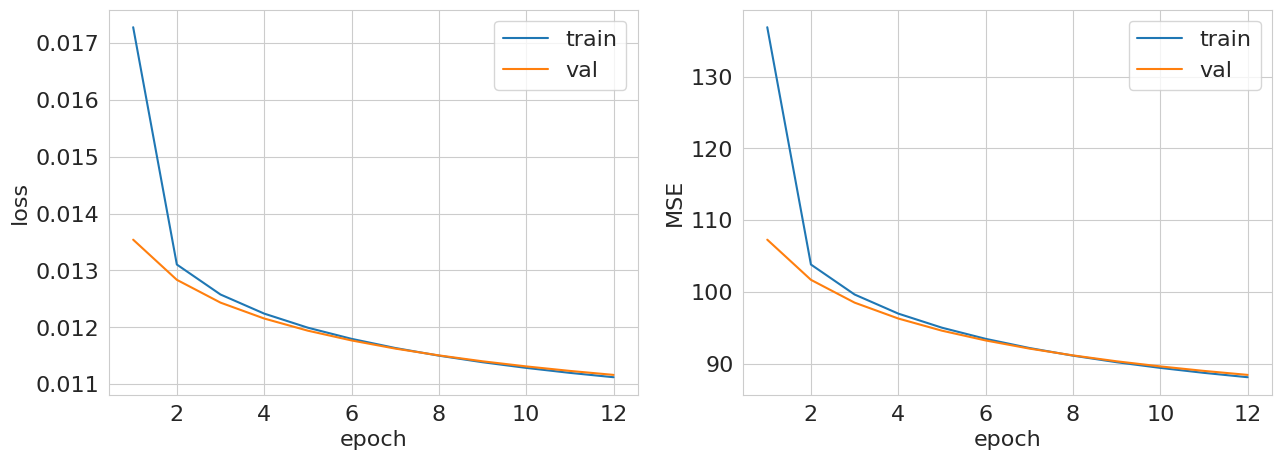

Train loss: 0.011
Train MSE: 88.096
Validation loss: 0.011
Validation MSE: 88.420


(np.float64(88.0955164130378), np.float64(88.42023528367227))

In [14]:
train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.SGD(model, lr=1e-2)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [13]:
batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1

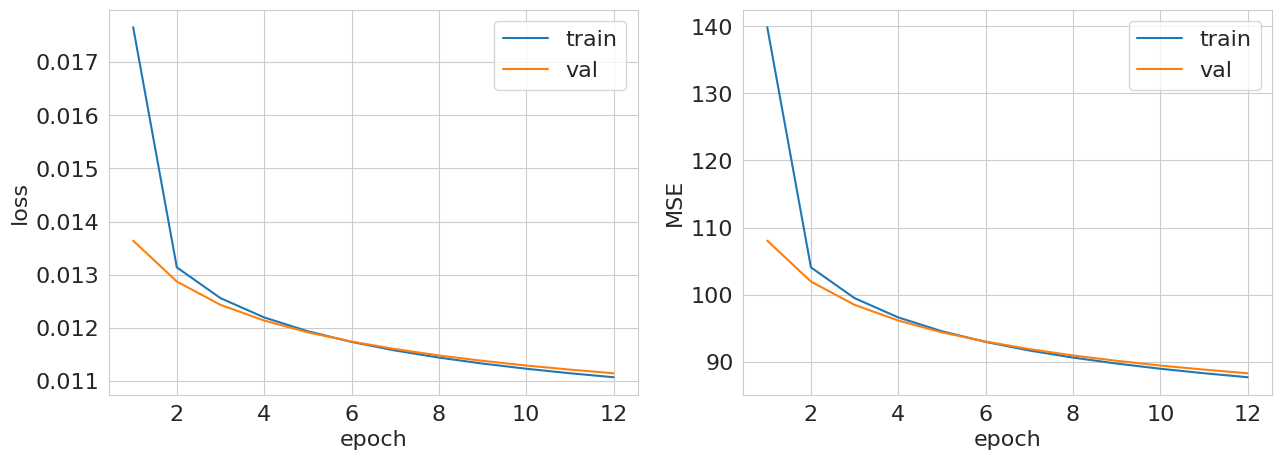

Train loss: 0.011
Train MSE: 87.678
Validation loss: 0.011
Validation MSE: 88.264


In [16]:
val_mse = []
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.SGD(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)

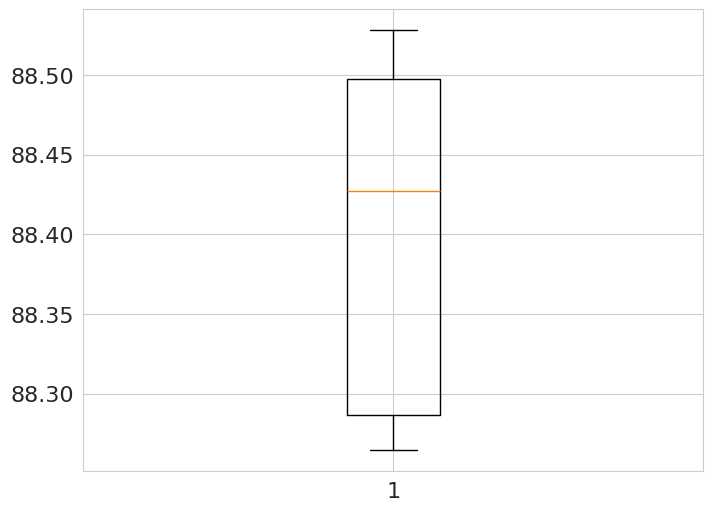

In [17]:
fig = plt.figure(figsize =(8, 6))
plt.boxplot(val_mse)
plt.show()

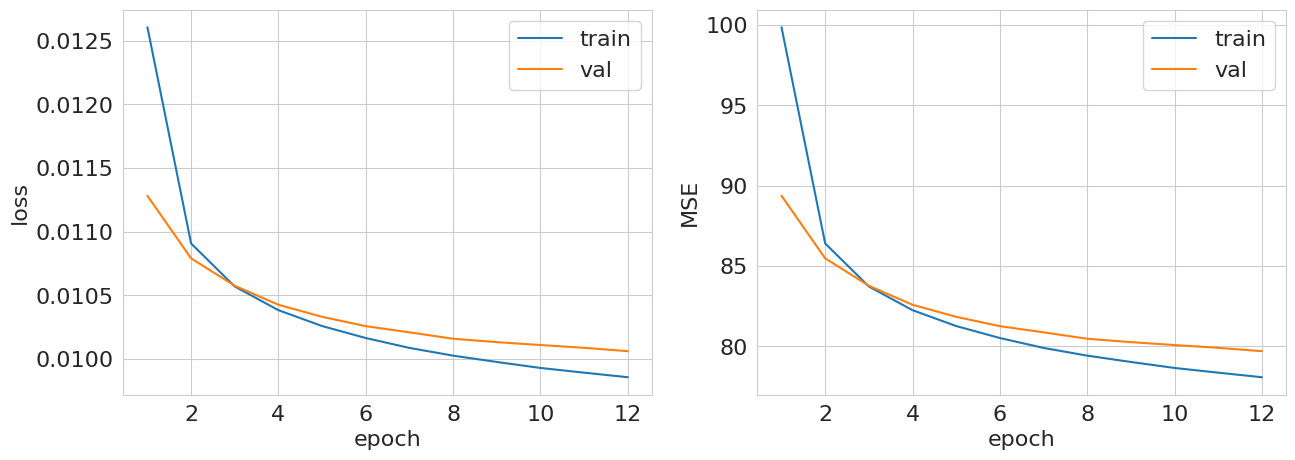

Train loss: 0.010
Train MSE: 78.075
Validation loss: 0.010
Validation MSE: 79.696


In [18]:
val_mse = []
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.SGD(model, lr=1e-3, momentum = 0.9)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)

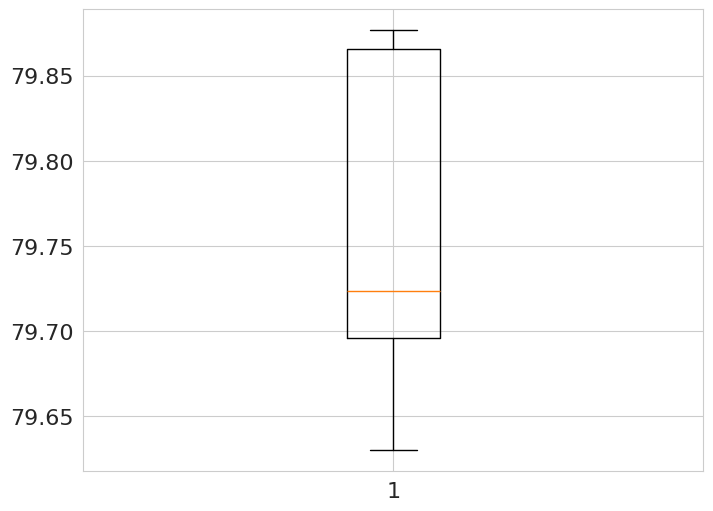

In [19]:
fig = plt.figure(figsize =(8, 6))
plt.boxplot(val_mse)
plt.show()

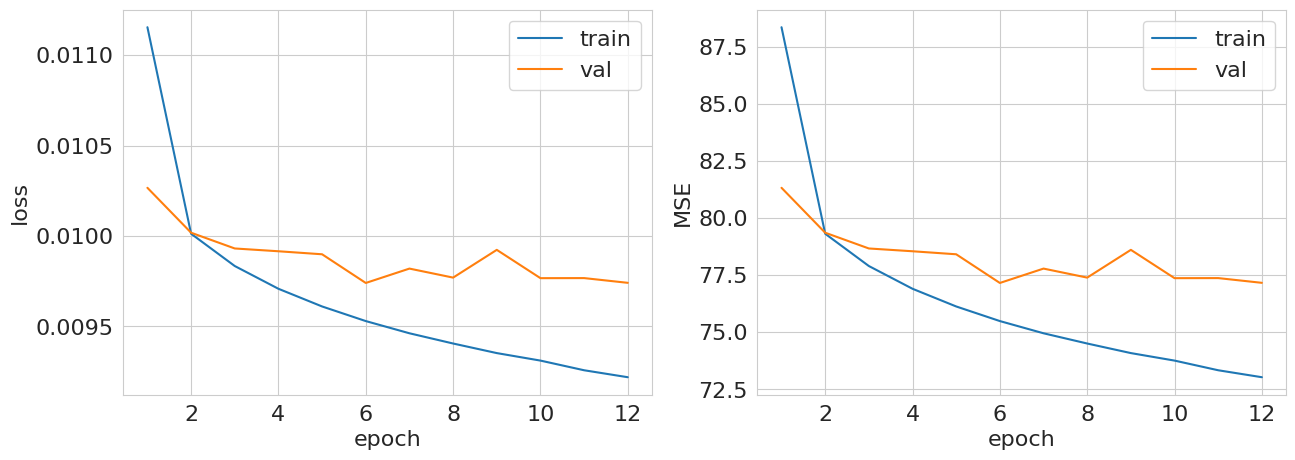

Train loss: 0.009
Train MSE: 73.027
Validation loss: 0.010
Validation MSE: 77.159


In [21]:
val_mse = []
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)

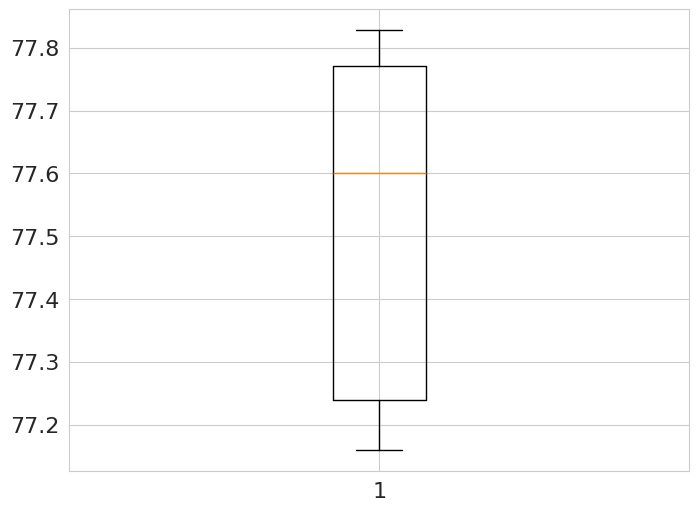

In [22]:
fig = plt.figure(figsize =(8, 6))
plt.boxplot(val_mse)
plt.show()

С Adam ситуация лучше всего, с чистым SGD - хуже всего.

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

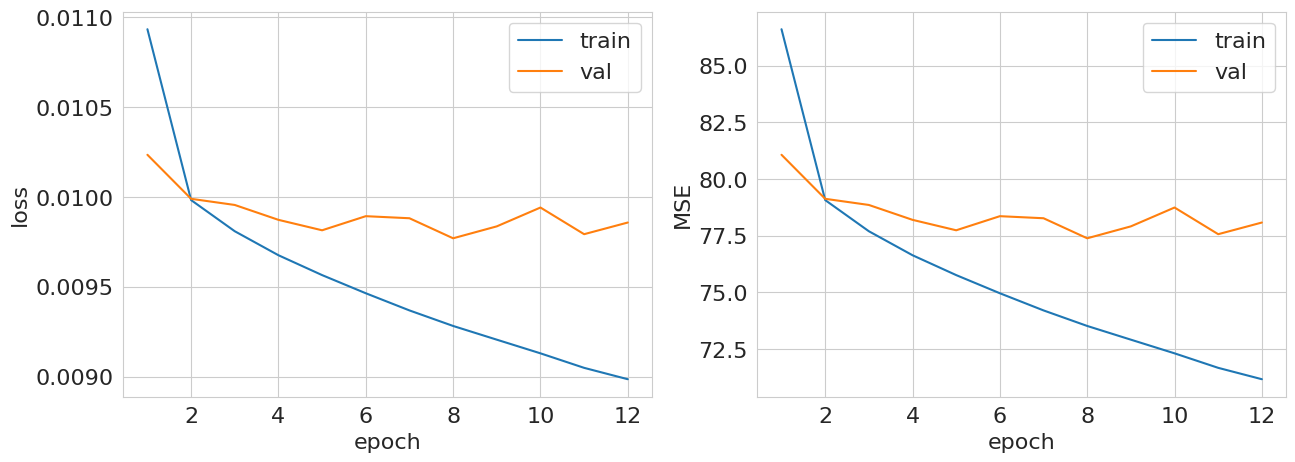

Train loss: 0.009
Train MSE: 71.170
Validation loss: 0.010
Validation MSE: 78.084


In [23]:
val_mse = []
train_mse = []
hidden_size = 256
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)
    train_mse.append(tr)

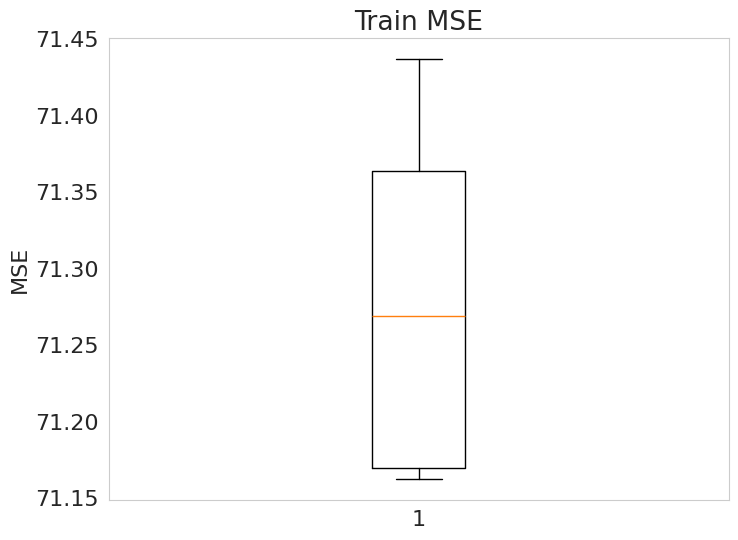

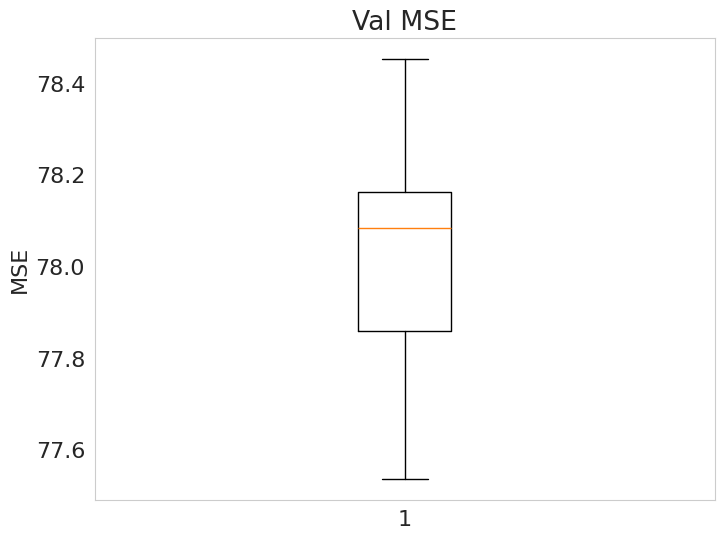

In [33]:
fig1 = plt.figure(figsize=(8, 6))
plt.boxplot(train_mse)
plt.title('Train MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

fig2 = plt.figure(figsize=(8, 6))
plt.boxplot(val_mse)
plt.title('Val MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

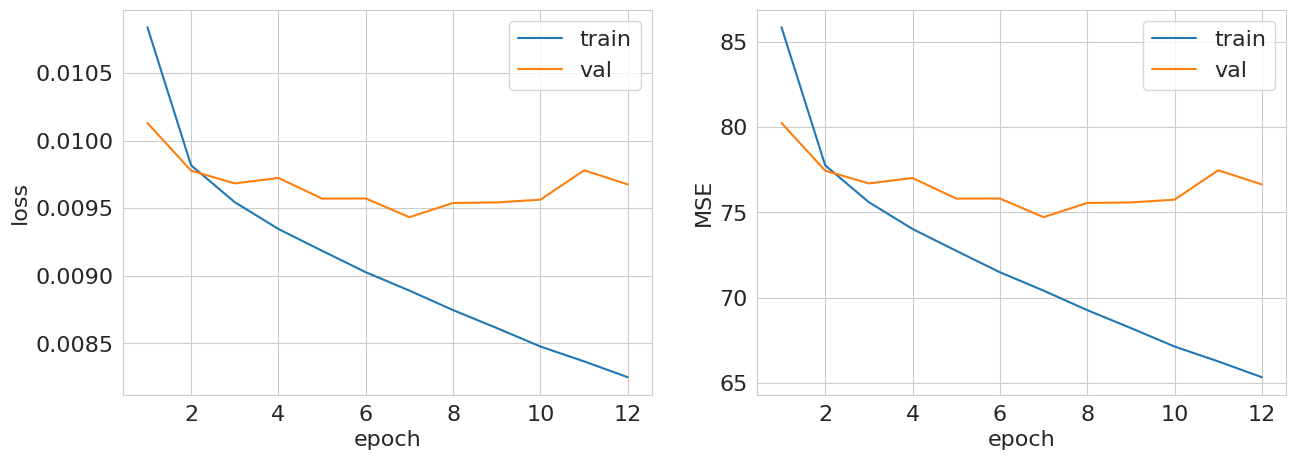

Train loss: 0.008
Train MSE: 65.336
Validation loss: 0.010
Validation MSE: 76.635


In [35]:
val_mse = []
train_mse = []
hidden_size = 128
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)
    train_mse.append(tr)

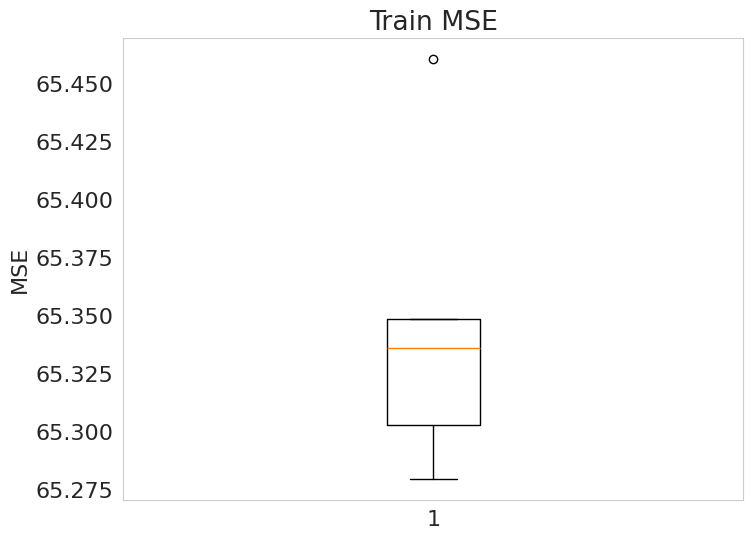

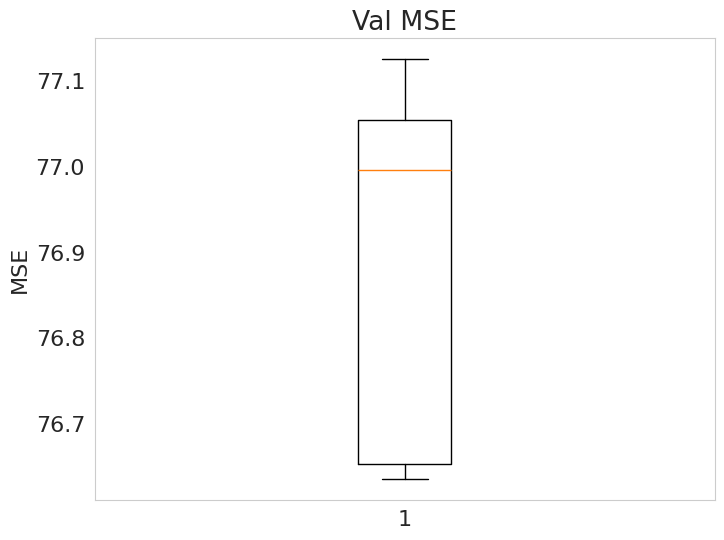

In [36]:
fig1 = plt.figure(figsize=(8, 6))
plt.boxplot(train_mse)
plt.title('Train MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

fig2 = plt.figure(figsize=(8, 6))
plt.boxplot(val_mse)
plt.title('Val MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

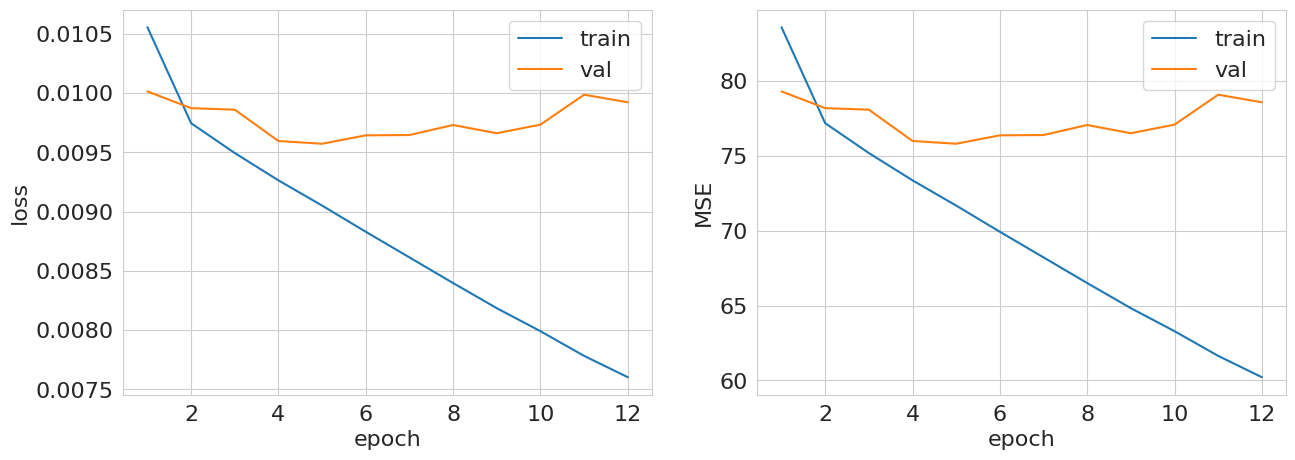

Train loss: 0.008
Train MSE: 60.211
Validation loss: 0.010
Validation MSE: 78.592


In [38]:
val_mse = []
train_mse = []
hidden_size = 256
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)
    train_mse.append(tr)

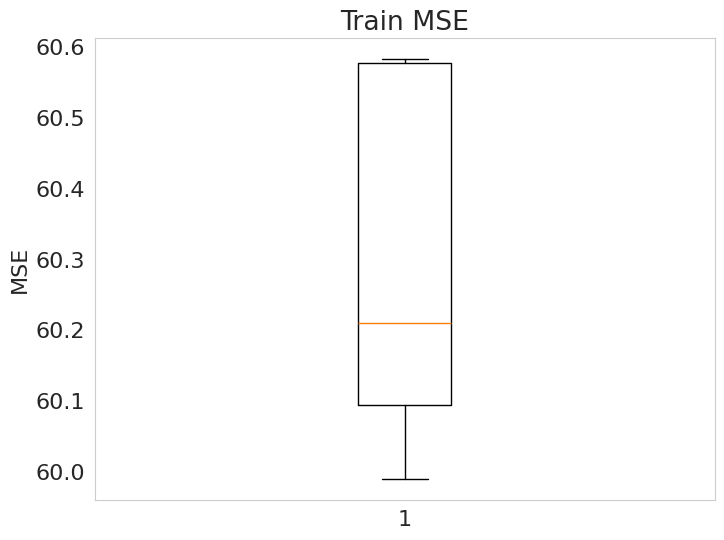

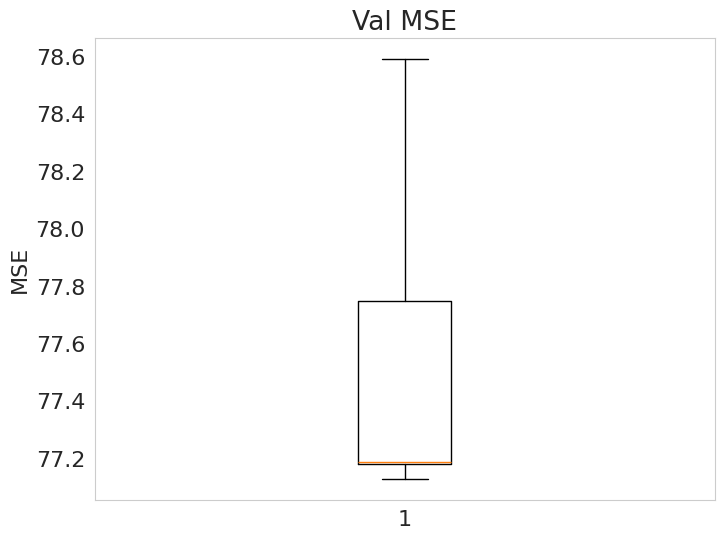

In [39]:
fig1 = plt.figure(figsize=(8, 6))
plt.boxplot(train_mse)
plt.title('Train MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

fig2 = plt.figure(figsize=(8, 6))
plt.boxplot(val_mse)
plt.title('Val MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

Модель стала сильнее переобучаться, разница между валидацией и трейном стала большой, особенно это видно на последних эскпериментах


**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов. 

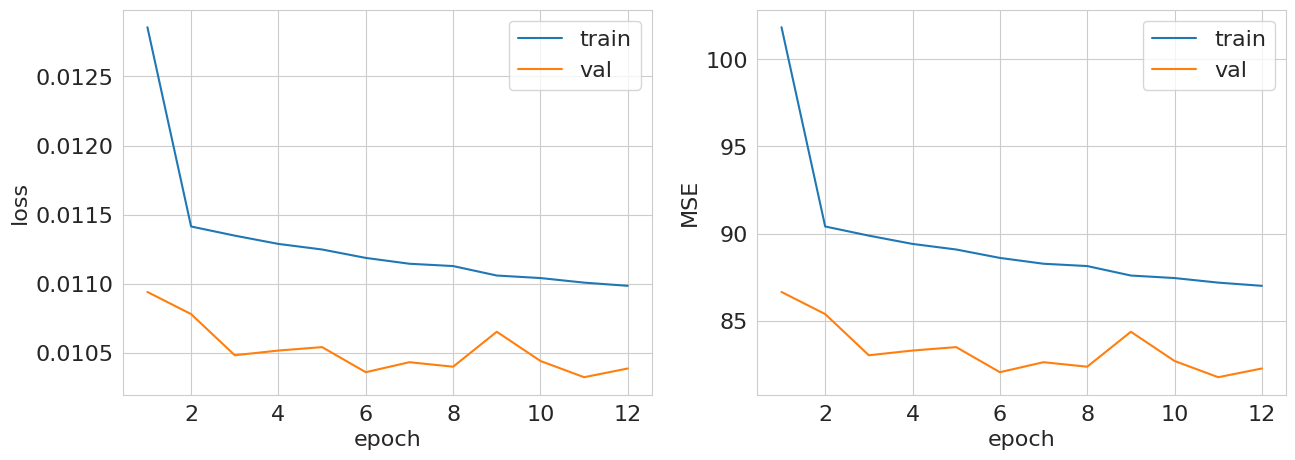

Train loss: 0.011
Train MSE: 87.016
Validation loss: 0.010
Validation MSE: 82.280


In [40]:
val_mse = []
train_mse = []
hidden_size = 256
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.Dropout(p=0.2), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.Dropout(p=0.2), mm.ReLU(),
                          mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)
    train_mse.append(tr)

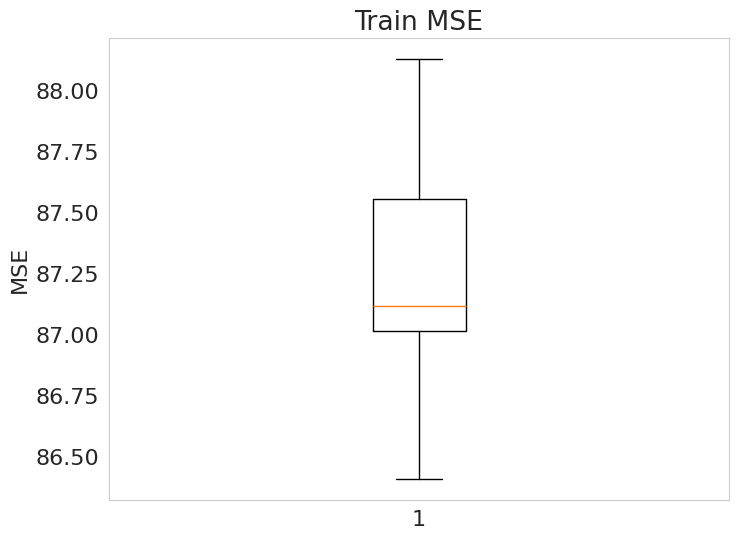

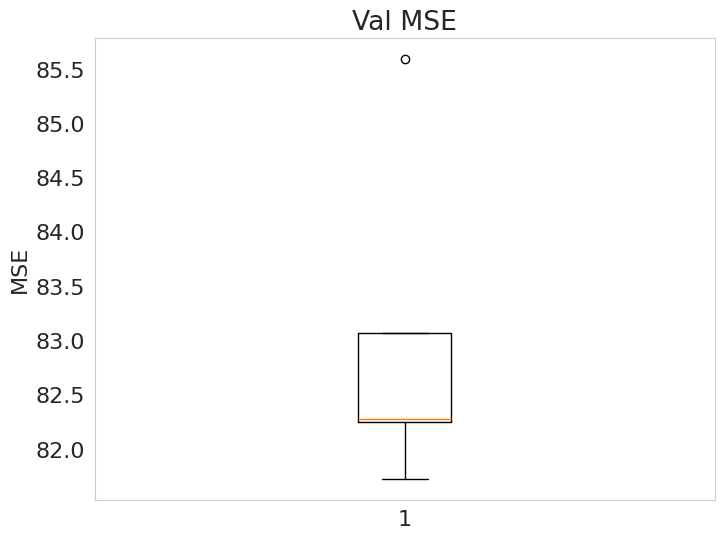

In [41]:
fig1 = plt.figure(figsize=(8, 6))
plt.boxplot(train_mse)
plt.title('Train MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

fig2 = plt.figure(figsize=(8, 6))
plt.boxplot(val_mse)
plt.title('Val MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

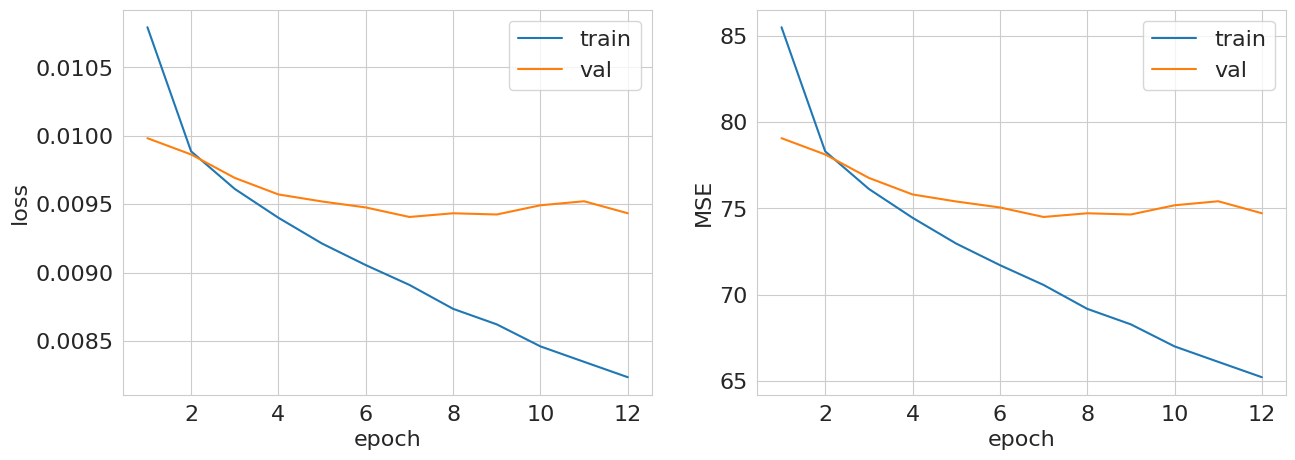

Train loss: 0.008
Train MSE: 65.228
Validation loss: 0.009
Validation MSE: 74.721


In [43]:
val_mse = []
train_mse = []
hidden_size = 256
for _ in range(5):
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(),
                          mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)
    val_mse.append(va)
    train_mse.append(tr)

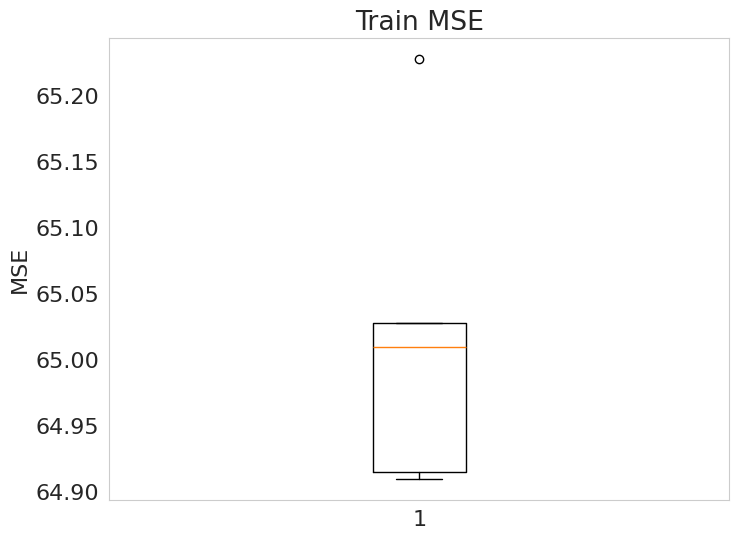

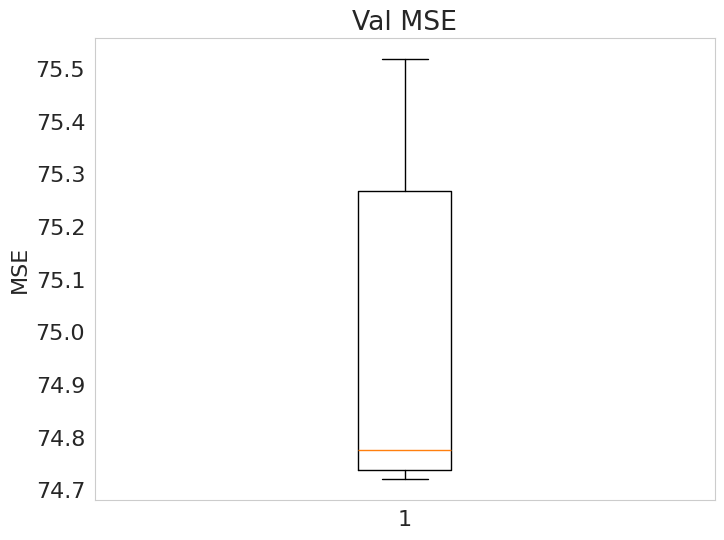

In [44]:
fig1 = plt.figure(figsize=(8, 6))
plt.boxplot(train_mse)
plt.title('Train MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

fig2 = plt.figure(figsize=(8, 6))
plt.boxplot(val_mse)
plt.title('Val MSE')
plt.ylabel('MSE')
plt.grid()
plt.show(block=False) 

С батч-нормализацией значительно лучше. Думаю, это тоже связано с характером распределения данных.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [19]:
grid = np.logspace(-5, -2, 4)

val_mse = []
train_mse = []
hidden_size = 256
for lr_test in grid:
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(),
                          mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=lr_test)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=False)
    print(f'MSE on validation: {va}, lr = {lr_test}')

MSE on validation: 78.86983731357023, lr = 1e-05
MSE on validation: 76.50639351082913, lr = 0.0001
MSE on validation: 74.95450037565297, lr = 0.001
MSE on validation: 74.83549173688411, lr = 0.01


In [20]:
best_lr = 0.01

In [23]:
decay_grid = np.logspace(-6, -3, 4)

val_mse = []
train_mse = []
hidden_size = 256
for decay_test in decay_grid:
    train_loader = mm.DataLoader(X_train_new, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
    val_loader = mm.DataLoader(X_val_new, normalize(y_val).reshape(-1, 1), batch_size, shuffle=False)
    model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), 
                          mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(),
                          mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model, lr=best_lr, weight_decay = decay_test)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=False)
    val_mse.append((va, decay_test))
    print(f'MSE on validation: {va}, lr = {best_lr}, weight_decay = {decay_test}')

MSE on validation: 80.05340069912303, lr = 0.01, weight_decay = 1e-06
MSE on validation: 83.9058066525051, lr = 0.01, weight_decay = 1e-05
MSE on validation: 86.97282782279211, lr = 0.01, weight_decay = 0.0001
MSE on validation: 94.72734970709396, lr = 0.01, weight_decay = 0.001


Лучшая MSE была при weight_decay = 0

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

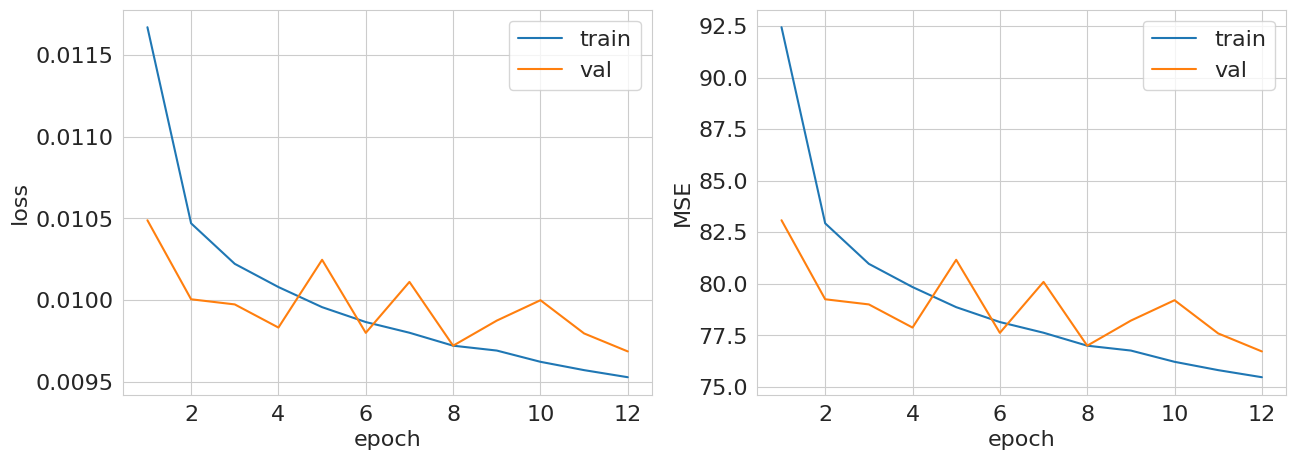

Train loss: 0.010
Train MSE: 75.462
Validation loss: 0.010
Validation MSE: 76.714


In [24]:
train_loader = mm.DataLoader(X_train, normalize(y_train).reshape(-1, 1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_test, normalize(y_test).reshape(-1, 1), batch_size, shuffle=False)
model = mm.Sequential(mm.Linear(in_features, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), 
                      mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(),
                      mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.Adam(model, lr=best_lr)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
tr, va = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 12, verbose=True)

Таки получили качество лучше, чем у бейзлана, где было MSE 89.8. Ура победа